In [3]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [4]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [6]:
df1=pd.read_csv(r"E:\D Drive\My Sphere\Mid - Prep\order_data_last_six_month.xlsx - Worksheet.csv")

In [7]:
df1.shape

(64459, 14)

In [8]:
df1.head()

order_date  order_id     order_number  customer_id  \
0  03/04/2025    136349  SO/25-26/000818         5235   
1  30/01/2025    110393   SO/24-25/90881         7622   
2  12/02/2025    116427   SO/24-25/96511         3827   
3  26/12/2024     96182   SO/24-25/77411         2223   
4  30/12/2024     97858   SO/24-25/78975         6903   

                    customer_name       poc_name  poc_id    amount  discount  \
0  Anshu General Store Sector 34     Vikas Gupta       6  19125.00   1650.00   
1                  bhai di rasoi   Abhay Srimali    7814   9670.48    735.48   
2      Shama chicken corner beta     Yash Pandey      51  62500.00   5000.00   
3       Bikaner Sweets ( Harola )      Swatantra      25   4520.00    420.00   
4            Lucknow kirana store      Raj Kumar    7039   1700.00      0.00   

   net_order_amount  profit order_status warehouse_name  warehouse_id  
0           17475.0     0.0       CLOSED          Noida             3  
1            8935.0   -56.4       CLOSED  Greater NOIDA             6  
2           57500.0  -650.0       CLOSED          Noida             3  
3            4100.0    40.0       CLOSED          Noida             3  
4            1700.0   -88.0       CLOSED    Gomti Nagar             1

In [9]:
df2=pd.read_csv(r"E:\D Drive\My Sphere\Mid - Prep\associated_order_item_data_last_six_month.xlsx - Worksheet.csv")

In [10]:
df2.shape

(115093, 11)

In [11]:
df2.head()

order_id    order_number  order_item_id           item_name  quantity  \
0    104592  SO/24-25/85358         202967        Anannya Rice         2   
1     74112  SO/24-25/55656         148560  Ambey Patent Maida         1   
2    105873  SO/24-25/86555         205222           Arhar Dal        10   
3    112302  SO/24-25/92717         216104         Kezar Maida         5   
4     74308  SO/24-25/55887         148902        Normal Sugar         1   

   invoiced_quantity       mrp  price_per_unit   amount  discount_amount  \
0                  2  1732.000          1534.0  3464.00           396.00   
1                  1  1899.000          1760.0  1899.00           139.00   
2                  0   173.567           127.0  1735.67           465.67   
3                  5  1760.000          1652.0  8800.00           540.00   
4                  1  2190.000          2110.0  2190.00            80.00   

   profit  
0  -208.0  
1   -10.0  
2  -377.0  
3  -140.0  
4    40.0

In [12]:
merged_df = pd.merge(df1, df2, on='order_id', how='inner')
merged_df.shape

(115093, 24)

In [13]:
merged_df.head()

order_date  order_id   order_number_x  customer_id  \
0  03/04/2025    136349  SO/25-26/000818         5235   
1  30/01/2025    110393   SO/24-25/90881         7622   
2  30/01/2025    110393   SO/24-25/90881         7622   
3  30/01/2025    110393   SO/24-25/90881         7622   
4  30/01/2025    110393   SO/24-25/90881         7622   

                    customer_name       poc_name  poc_id  amount_x  discount  \
0  Anshu General Store Sector 34     Vikas Gupta       6  19125.00   1650.00   
1                  bhai di rasoi   Abhay Srimali    7814   9670.48    735.48   
2                  bhai di rasoi   Abhay Srimali    7814   9670.48    735.48   
3                  bhai di rasoi   Abhay Srimali    7814   9670.48    735.48   
4                  bhai di rasoi   Abhay Srimali    7814   9670.48    735.48   

   net_order_amount  ...   order_number_y order_item_id  \
0           17475.0  ...  SO/25-26/000818        257223   
1            8935.0  ...   SO/24-25/90881        212849   
2            8935.0  ...   SO/24-25/90881        212850   
3            8935.0  ...   SO/24-25/90881        212851   
4            8935.0  ...   SO/24-25/90881        212852   

                   item_name  quantity invoiced_quantity       mrp  \
0  Ruchi Gold Palm Pouch(1L)        15                15  1275.000   
1  Ruchi Gold Palm Pouch(1L)         2                 2  1350.000   
2     Fortune Soya Pouch(1L)         1                 1  2450.000   
3                    HP Atta        75                75    38.273   
4                  Shudh Oil         1                 1  1650.000   

  price_per_unit  amount_y  discount_amount  profit_y  
0         1165.0  19125.00          1650.00       0.0  
1         1250.0   2700.00           200.00       0.0  
2         2300.0   2450.00           150.00     -10.0  
3           35.0   2870.48           245.48     -32.4  
4         1510.0   1650.00           140.00     -14.0  

[5 rows x 24 columns]

In [14]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115093 entries, 0 to 115092
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   order_date         115093 non-null  object 
 1   order_id           115093 non-null  int64  
 2   order_number_x     115093 non-null  object 
 3   customer_id        115093 non-null  int64  
 4   customer_name      115093 non-null  object 
 5   poc_name           115093 non-null  object 
 6   poc_id             115093 non-null  int64  
 7   amount_x           115093 non-null  float64
 8   discount           115093 non-null  float64
 9   net_order_amount   115093 non-null  float64
 10  profit_x           115093 non-null  float64
 11  order_status       115093 non-null  object 
 12  warehouse_name     115093 non-null  object 
 13  warehouse_id       115093 non-null  int64  
 14  order_number_y     115093 non-null  object 
 15  order_item_id      115093 non-null  int64  
 16  it

In [13]:
missing=merged_df["customer_id"].isna().mean()
missing

0.0

In [27]:
merged_df.duplicated().sum()

0

In [29]:
merged_df.nunique()

order_date              190
order_id              64459
order_number_x        64459
customer_id            4161
customer_name          4093
poc_name                 94
poc_id                   97
amount_x              16440
discount               9525
net_order_amount      13168
profit_x               6643
order_status              2
warehouse_name            6
warehouse_id              6
order_number_y        64459
order_item_id        115093
item_name               607
quantity                117
invoiced_quantity       128
mrp                    1992
price_per_unit         2216
amount_y               8264
discount_amount        6429
profit_y               4614
dtype: int64

In [31]:
# Group by customer_name and collect unique customer_ids
customer_id_mapping = merged_df.groupby('customer_name')['customer_id'].unique()

# Filter for customers with multiple IDs
customers_with_multiple_ids = customer_id_mapping[customer_id_mapping.apply(len) > 1]

print(f"Found {len(customers_with_multiple_ids)} customers with multiple IDs:")
print(customers_with_multiple_ids)

Found 59 customers with multiple IDs:
customer_name
93 Bataliyan CRPF                            [4386, 4141]
Ahmad Kirana Store                             [4220, 41]
Anoop General Store                          [5321, 5740]
Awasthi General Store                         [282, 9074]
Balaji Kirana Store                          [6725, 5486]
Balaji Sweets                                 [2281, 311]
Bangali Sweets                               [4889, 3395]
CHAURASIYA GENERAL STORE                     [7463, 5430]
Champaran Meat House                         [2296, 8862]
Deepak General Store                          [436, 5288]
GUPTA GENERAL STORE                          [7406, 5252]
Guddu general Store                          [8139, 8990]
Gupta General Store                     [6080, 3661, 656]
Gupta General Store                    [6204, 6014, 6130]
Gupta Puri Bhandar                             [3372, 87]
Gupta sweet shop                             [1720, 2420]
Harsh General Store 

In [33]:
# First, check if there are any customer_ids assigned to multiple names
id_to_names = merged_df.groupby('customer_id')['customer_name'].unique()

# Filter for customer_ids with multiple names
conflicting_ids = id_to_names[id_to_names.apply(len) > 1]

print(f"Found {len(conflicting_ids)} customer IDs assigned to multiple names:")
print(conflicting_ids)

# Optional: Create a detailed view of these cases
if not conflicting_ids.empty:
    conflict_details = merged_df[merged_df['customer_id'].isin(conflicting_ids.index)]
    print("\nDetailed records showing the conflicts:")
    print(conflict_details.sort_values(['customer_id', 'customer_name'])[
        ['customer_id', 'customer_name', 'order_date', 'order_id']
    ].to_string())
else:
    print("No customer IDs are shared between multiple customer names.")

Found 0 customer IDs assigned to multiple names:
Series([], Name: customer_name, dtype: object)
No customer IDs are shared between multiple customer names.


In [35]:
# Get the unique values
unique_values = merged_df['customer_id'].unique()

# Get the number of unique values
num_unique_values = merged_df['customer_id'].nunique()

In [37]:
def has_unique_values(merged_df, column_name):
  num_unique_values = merged_df[column_name].nunique()
  num_rows = merged_df.shape[0]
  return num_unique_values == num_rows

In [43]:
has_unique_values(merged_df,'customer_name')

False

In [55]:
print(merged_df['poc_name'].nunique())
print(merged_df['warehouse_name'].nunique())
print(merged_df['poc_id'].nunique())

94
6
97


In [88]:
merged_df["item_name_clean"] = (
    merged_df["item_name"]
    .str.lower()                   # Convert to lowercase
    .str.strip()                    # Remove leading/trailing spaces
    .str.replace(r"[^\w\s]", "", regex=True)  # Remove special characters (e.g., "()")
    .str.replace(r"\s+", " ", regex=True)     # Replace multiple spaces with one
)

In [89]:
merged_df["item_id"], unique_items = pd.factorize(merged_df["item_name_clean"])

In [92]:
merged_df["item_name_clean"]

0                 ruchi gold palm pouch1l
1                 ruchi gold palm pouch1l
2                    fortune soya pouch1l
3                                 hp atta
4                               shudh oil
                       ...               
115088    parivar pasand chakki aata 50kg
115089                        kezar maida
115090                      prakash maida
115091                        fryola palm
115092                        kezar maida
Name: item_name_clean, Length: 115093, dtype: object

In [97]:
import numpy as np
from scipy import stats

def detect_item_outliers(df, min_item_samples=5, z_threshold=3, iqr_multiplier=1.5):
    """
    Detect outliers for each item (grouped by item_id).
    """
    mask = np.ones(len(df), dtype=bool)
    
    for item_id, group in df.groupby("item_id"):
        item_quantities = group["quantity"].values
        
        if len(item_quantities) < min_item_samples:
            continue  # Skip items with too few samples
        
        # Z-score method (item-specific)
        z_scores = np.abs(stats.zscore(item_quantities))
        z_outliers = z_scores > z_threshold
        
        # IQR method (item-specific)
        Q1 = np.percentile(item_quantities, 25)
        Q3 = np.percentile(item_quantities, 75)
        IQR = Q3 - Q1
        iqr_lower = Q1 - iqr_multiplier * IQR
        iqr_upper = Q3 + iqr_multiplier * IQR
        iqr_outliers = (item_quantities < iqr_lower) | (item_quantities > iqr_upper)
        
        # Combine flags
        item_outliers = z_outliers | iqr_outliers
        mask[group.index] = ~item_outliers
    
    return df[mask].copy()

# Apply outlier removal
cleaned_df = detect_item_outliers(merged_df)

In [99]:
merged_df=cleaned_df

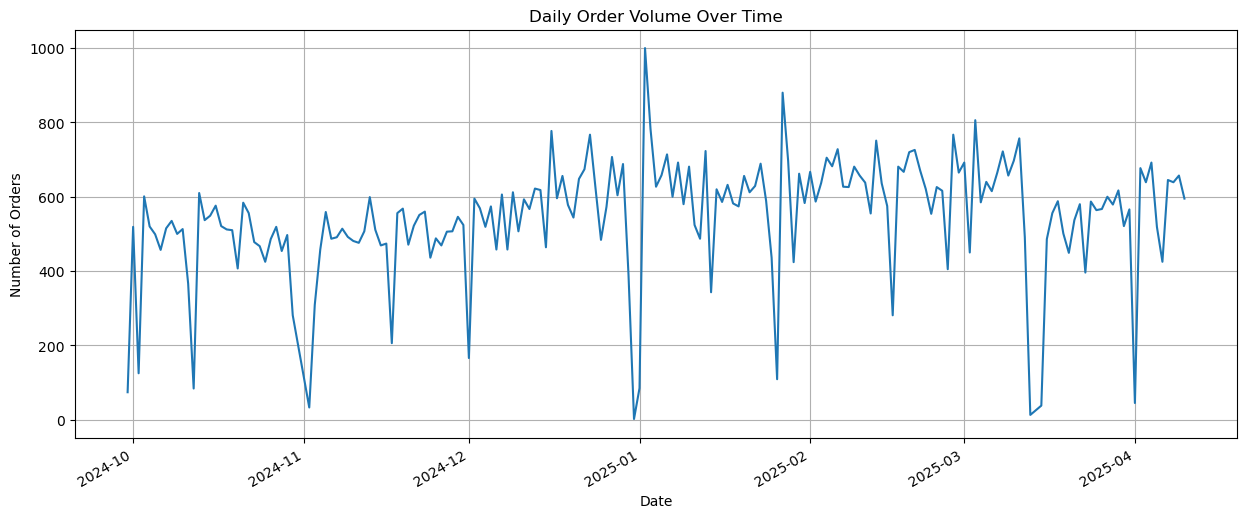

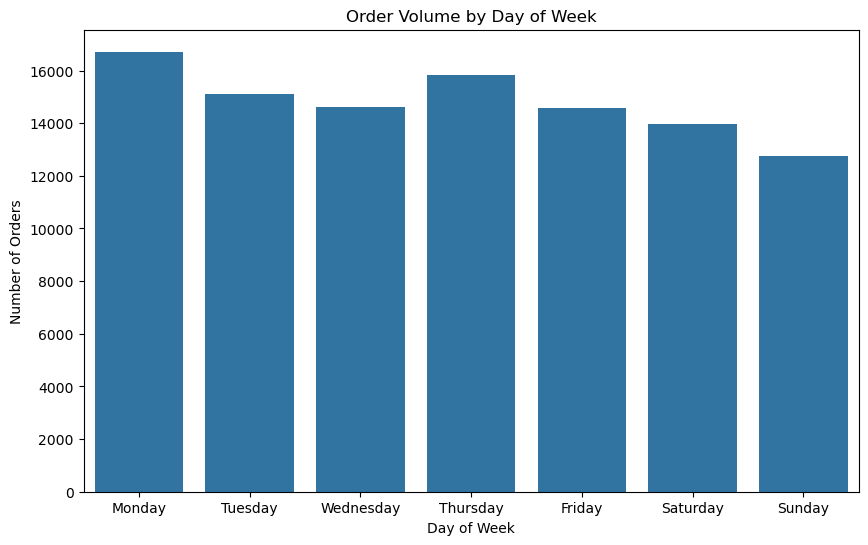

In [101]:
#Convert order_date to datetime, specifying the correct format
merged_df['order_date'] = pd.to_datetime(merged_df['order_date'], format='%d/%m/%Y')

# Plot daily order volume
plt.figure(figsize=(15, 6))
merged_df.groupby('order_date')['order_id'].count().plot()
plt.title('Daily Order Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()

# Plot weekly patterns
merged_df['day_of_week'] = merged_df['order_date'].dt.day_name()
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, x='day_of_week', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Order Volume by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.show()

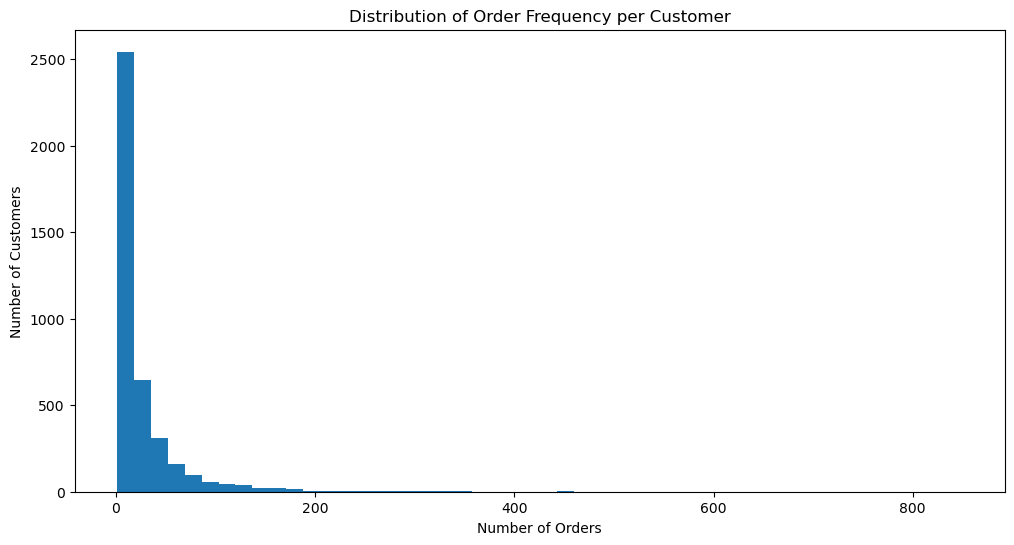

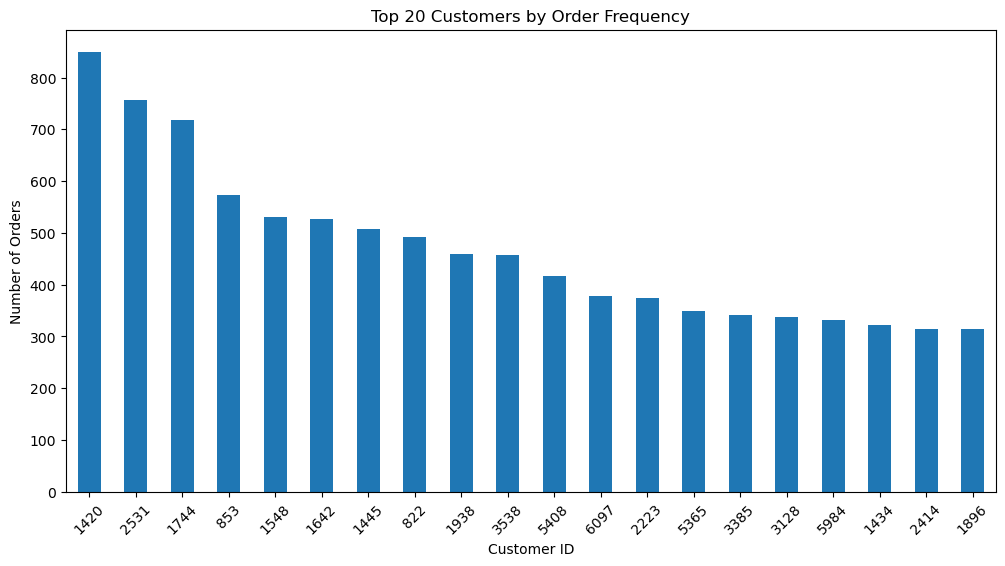

In [103]:
# Calculate order frequency per customer
customer_order_freq = merged_df.groupby('customer_id')['order_id'].count().sort_values(ascending=False)

# Plot distribution
plt.figure(figsize=(12, 6))
plt.hist(customer_order_freq, bins=50)
plt.title('Distribution of Order Frequency per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.show()

# Top customers by order frequency
plt.figure(figsize=(12, 6))
customer_order_freq.head(20).plot(kind='bar')
plt.title('Top 20 Customers by Order Frequency')
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

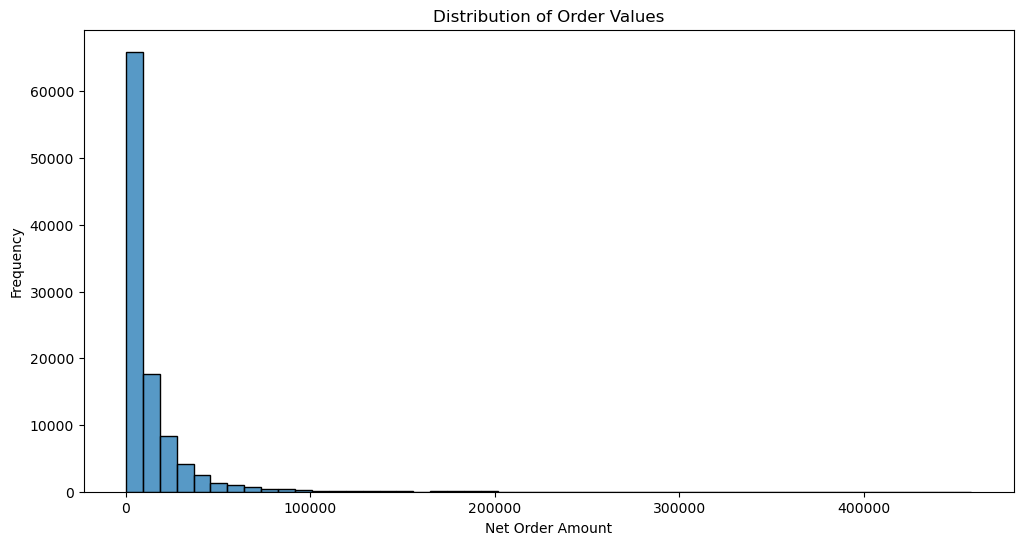

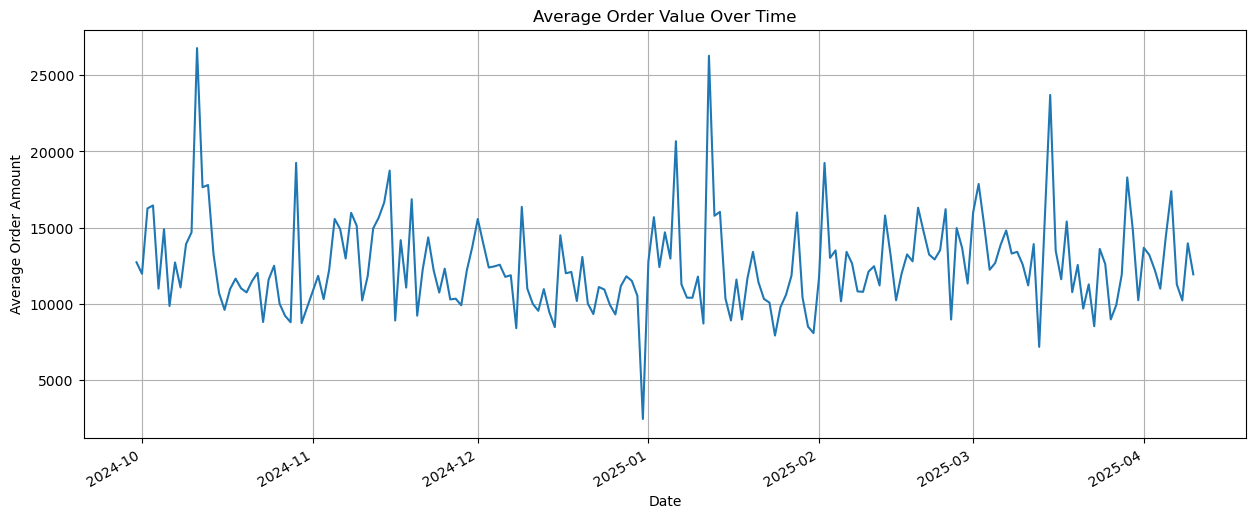

In [105]:
# Distribution of order values
plt.figure(figsize=(12, 6))
sns.histplot(merged_df['net_order_amount'], bins=50)
plt.title('Distribution of Order Values')
plt.xlabel('Net Order Amount')
plt.ylabel('Frequency')
plt.show()

# Order value trends over time
plt.figure(figsize=(15, 6))
merged_df.groupby('order_date')['net_order_amount'].mean().plot()
plt.title('Average Order Value Over Time')
plt.xlabel('Date')
plt.ylabel('Average Order Amount')
plt.grid(True)
plt.show()

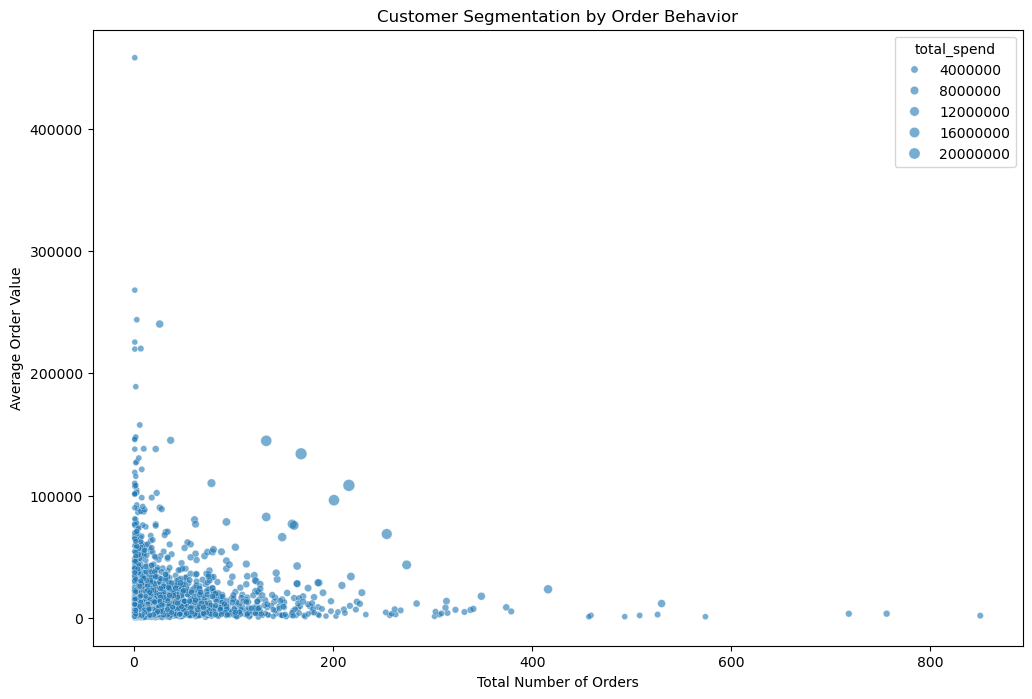

In [107]:
# Create customer metrics dataframe
customer_metrics = merged_df.groupby('customer_id').agg(
    total_orders=('order_id', 'count'),
    avg_order_value=('net_order_amount', 'mean'),
    total_spend=('net_order_amount', 'sum')
).reset_index()

# Scatter plot of order frequency vs average order value
plt.figure(figsize=(12, 8))
sns.scatterplot(data=customer_metrics, x='total_orders', y='avg_order_value', size='total_spend', alpha=0.6)
plt.title('Customer Segmentation by Order Behavior')
plt.xlabel('Total Number of Orders')
plt.ylabel('Average Order Value')
plt.show()

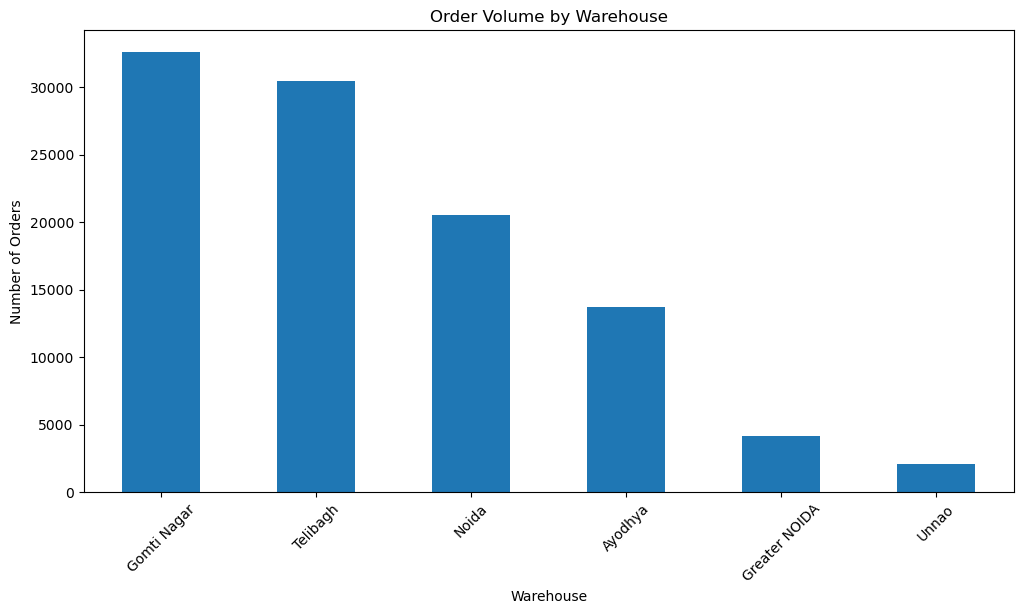

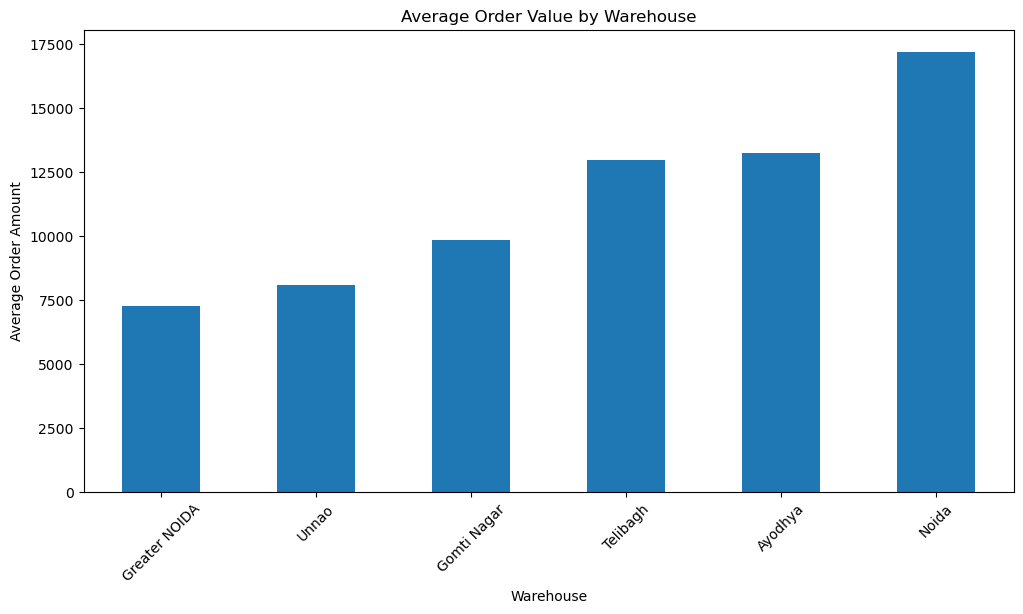

In [109]:
# Warehouse order volume
plt.figure(figsize=(12, 6))
merged_df['warehouse_name'].value_counts().plot(kind='bar')
plt.title('Order Volume by Warehouse')
plt.xlabel('Warehouse')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

# Warehouse average order value
plt.figure(figsize=(12, 6))
merged_df.groupby('warehouse_name')['net_order_amount'].mean().sort_values().plot(kind='bar')
plt.title('Average Order Value by Warehouse')
plt.xlabel('Warehouse')
plt.ylabel('Average Order Amount')
plt.xticks(rotation=45)
plt.show()

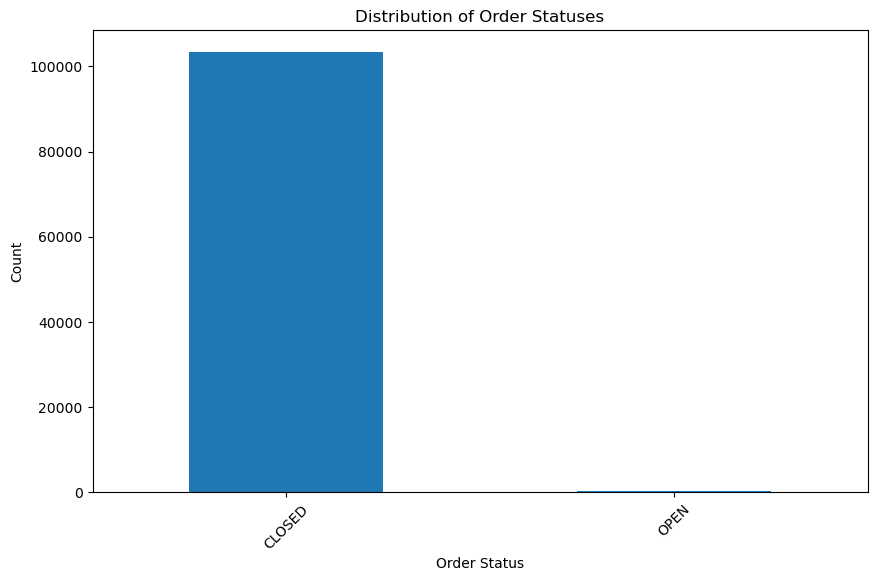

In [113]:
# Order status distribution
plt.figure(figsize=(10, 6))
merged_df['order_status'].value_counts().plot(kind='bar')
plt.title('Distribution of Order Statuses')
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Failed orders over time (if applicable)
if 'Failed' in merged_df['order_status'].unique() or 'Canceled' in merged_df['order_status'].unique():
    failed_orders = merged_df[merged_df['order_status'].isin(['Failed', 'Canceled'])]
    plt.figure(figsize=(15, 6))
    failed_orders.groupby('order_date')['order_id'].count().plot()
    plt.title('Failed/Canceled Orders Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Failed Orders')
    plt.grid(True)
    plt.show()

Closed order status means--> Almost all orders in were successfully processed & completed


and open means ---> Only a small portion of orders are still pending, unfulfilled, or in process at the time of data extraction.

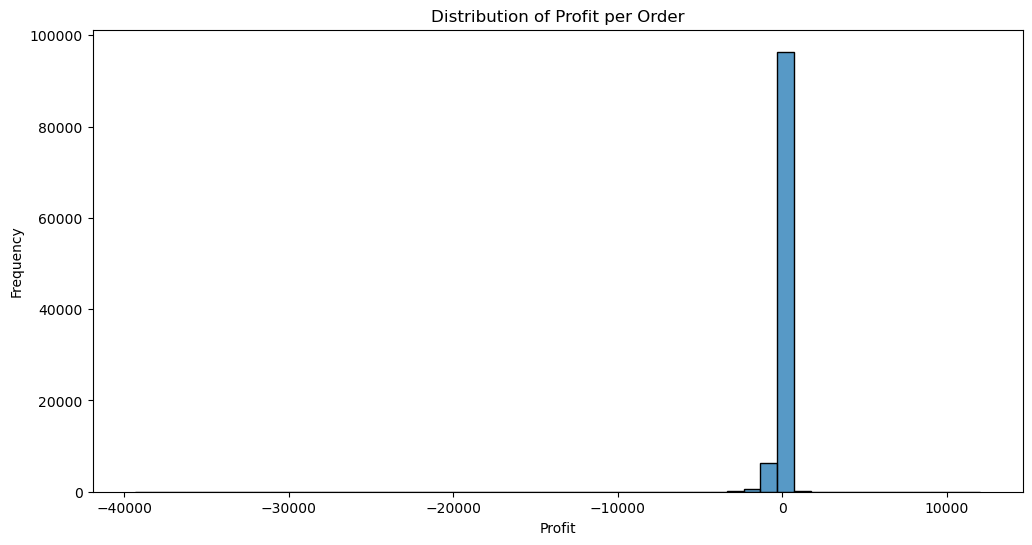

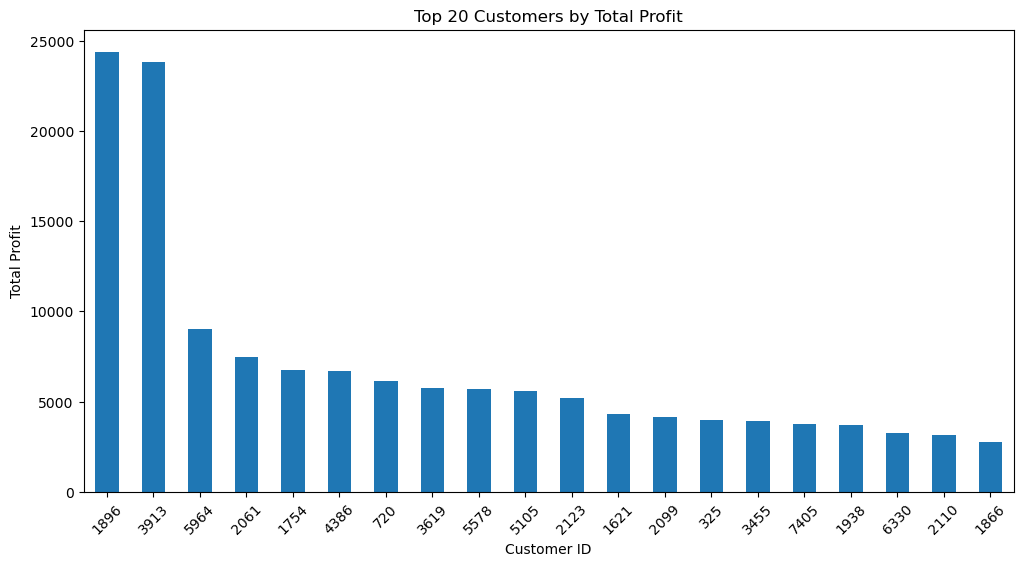

In [132]:
# Profit distribution
plt.figure(figsize=(12, 6))
sns.histplot(merged_df['profit_y'], bins=50)
plt.title('Distribution of Profit per Order')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()

# Top profitable customers
plt.figure(figsize=(12, 6))
merged_df.groupby('customer_id')['profit_y'].sum().sort_values(ascending=False).head(20).plot(kind='bar')
plt.title('Top 20 Customers by Total Profit')
plt.xlabel('Customer ID')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show()

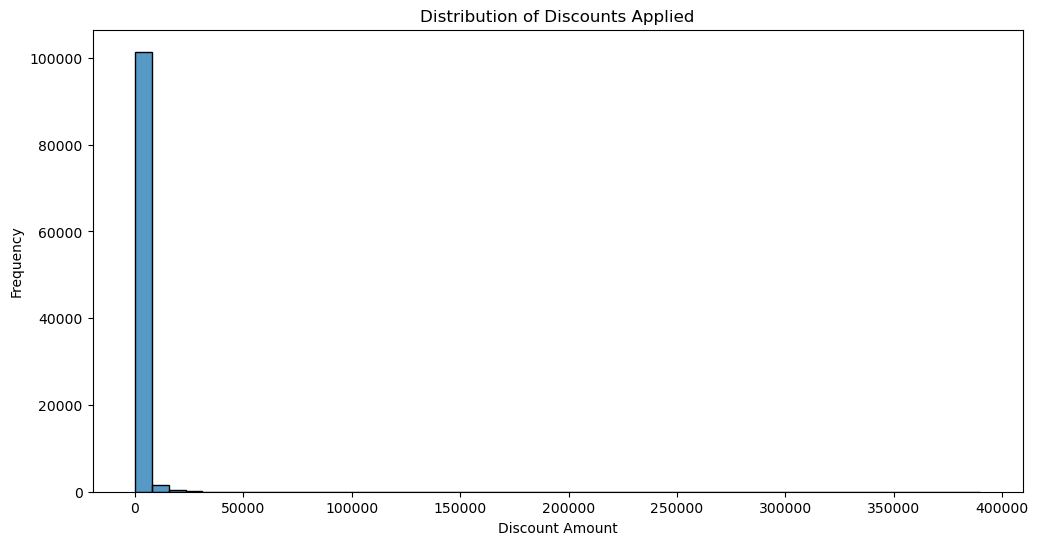

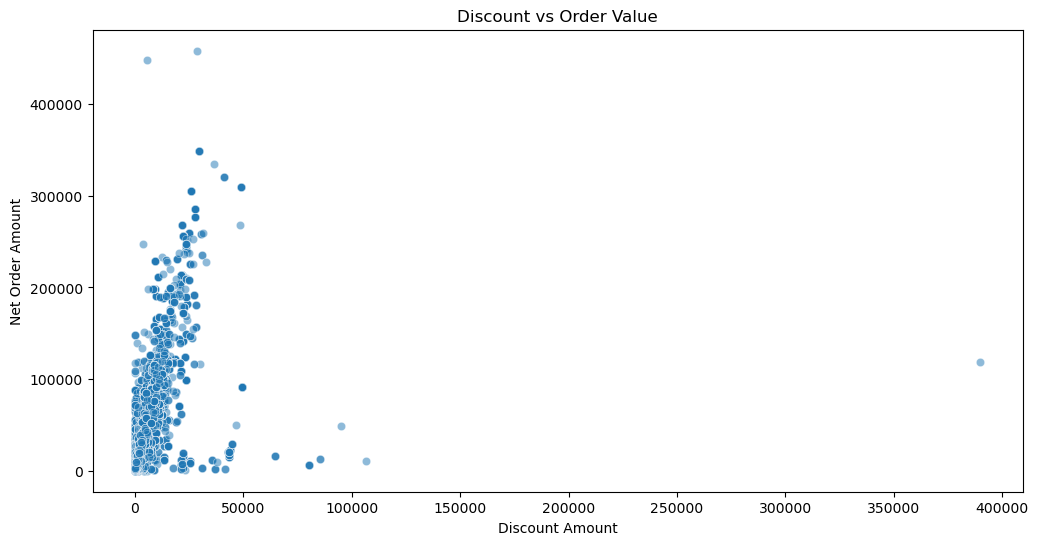

In [119]:
# Discount distribution
plt.figure(figsize=(12, 6))
sns.histplot(merged_df['discount'], bins=50)
plt.title('Distribution of Discounts Applied')
plt.xlabel('Discount Amount')
plt.ylabel('Frequency')
plt.show()

# Discount vs order value
plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_df, x='discount', y='net_order_amount', alpha=0.5)
plt.title('Discount vs Order Value')
plt.xlabel('Discount Amount')
plt.ylabel('Net Order Amount')
plt.show()

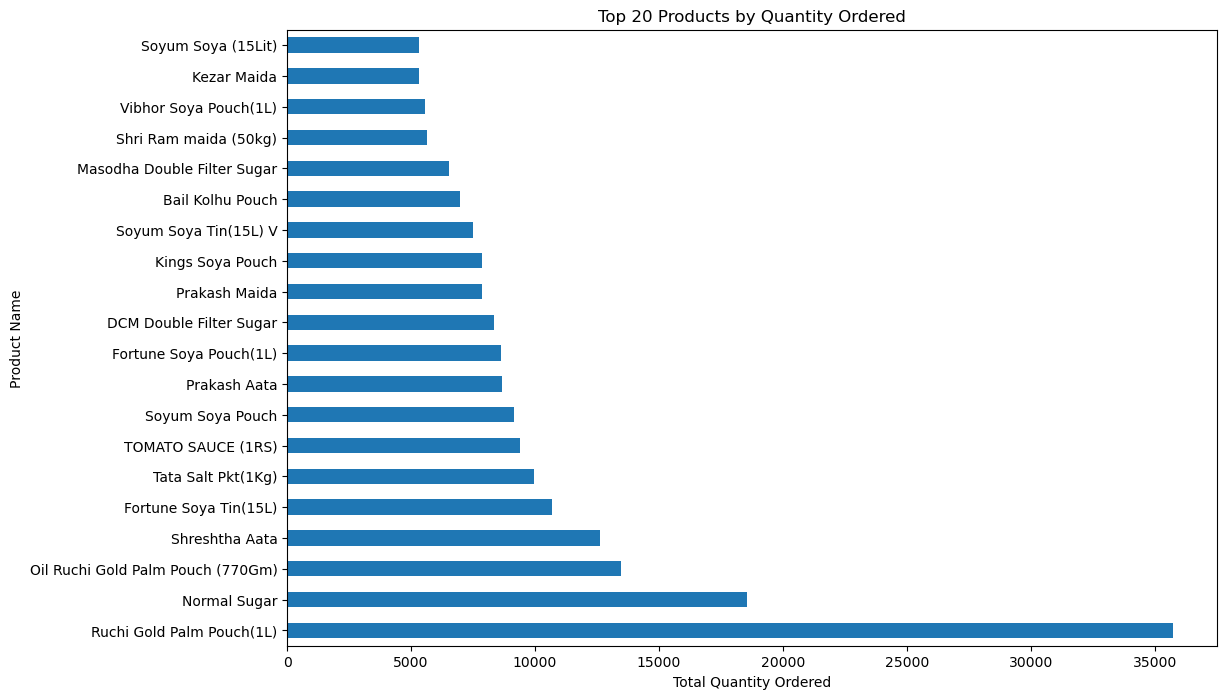

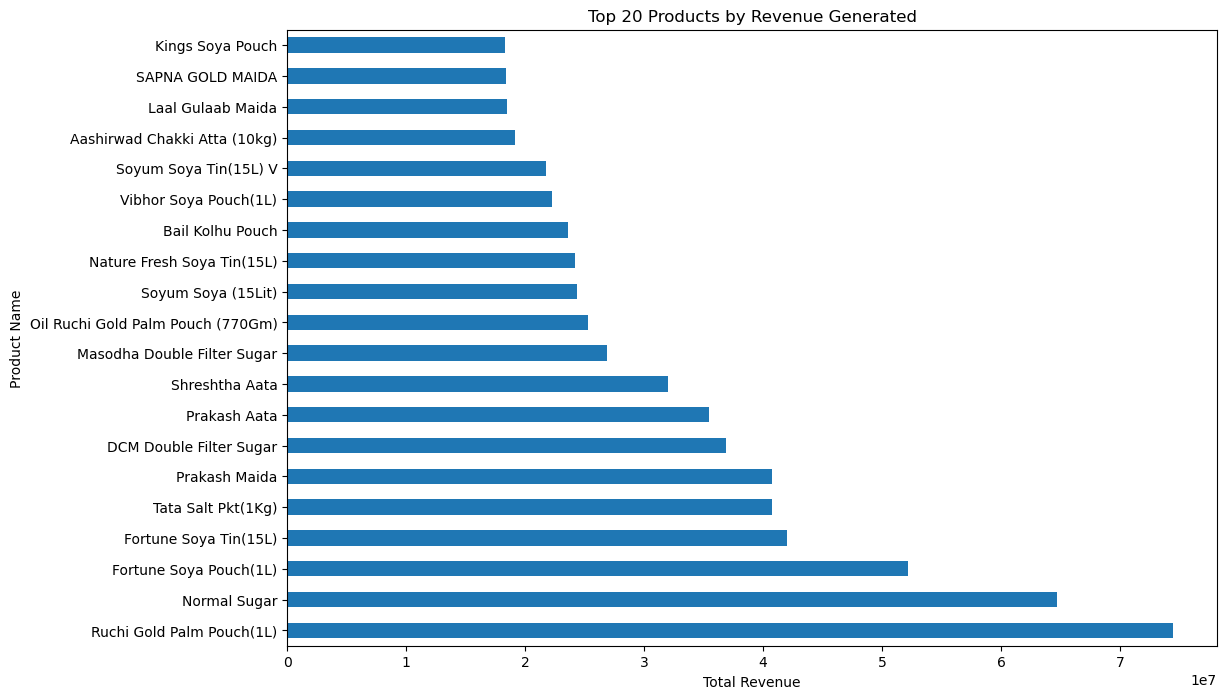

In [134]:
# Most frequently ordered products
top_products = merged_df.groupby('item_name')['quantity'].sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 8))
top_products.plot(kind='barh')
plt.title('Top 20 Products by Quantity Ordered')
plt.xlabel('Total Quantity Ordered')
plt.ylabel('Product Name')
plt.show()

# Products by revenue contribution
product_revenue = merged_df.groupby('item_name')['amount_x'].sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 8))
product_revenue.plot(kind='barh')
plt.title('Top 20 Products by Revenue Generated')
plt.xlabel('Total Revenue')
plt.ylabel('Product Name')
plt.show()

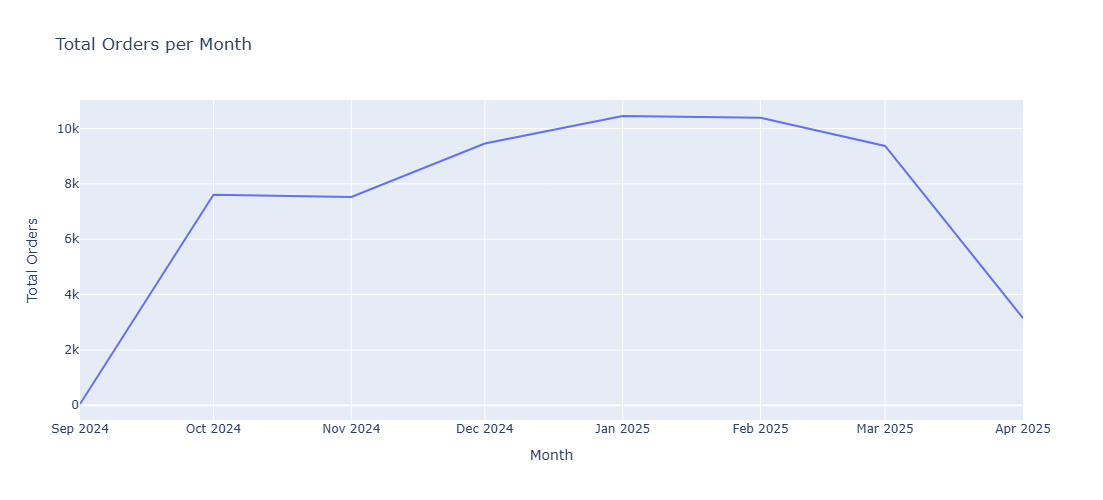

In [31]:
# Order Count vs. Time (Month/Year)   --> tells seasonality

orders_by_month = merged_df2.groupby('Month')['order_id'].nunique().reset_index()
orders_by_month.columns = ['Month', 'Total Orders']

fig = px.line(orders_by_month, x='Month', y='Total Orders', title='Total Orders per Month')

fig.update_layout(
    width=800,   # width in pixels (around 20 inches equivalent)
    height=500    # height in pixels (around 8 inches equivalent)
)

fig.show()


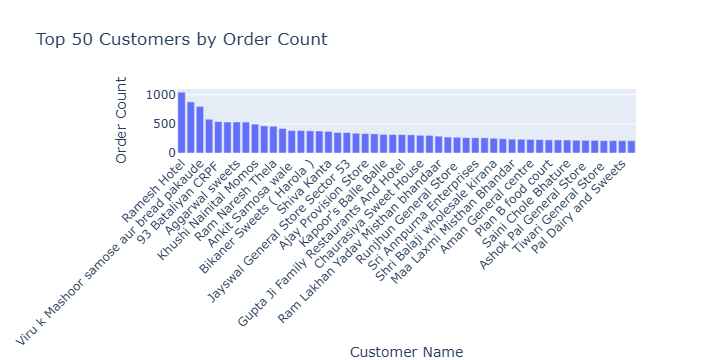

In [33]:
#  Orders by Customer

customer_orders = merged_df['customer_name'].value_counts().reset_index().head(50)
customer_orders.columns = ['Customer Name', 'Order Count']

fig = px.bar(customer_orders, x='Customer Name', y='Order Count', title='Top 50 Customers by Order Count')
fig.update_layout(xaxis_tickangle=-45)
fig.show()


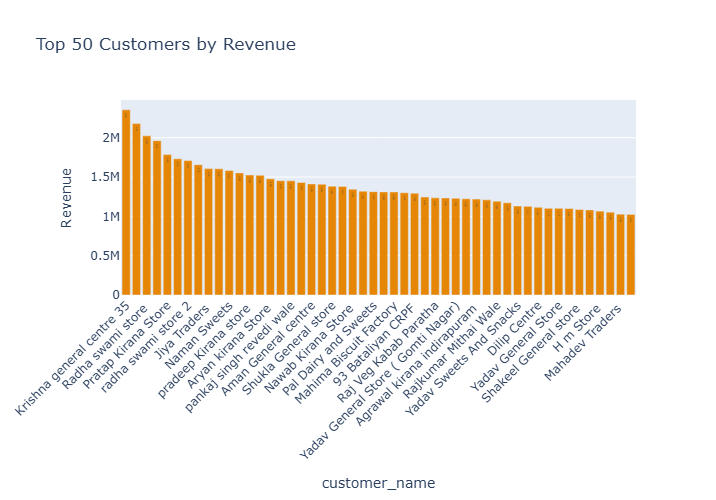

In [34]:
customer_revenue = merged_df2.groupby('customer_name')['Revenue'].sum().reset_index()
customer_revenue = customer_revenue.sort_values(by='Revenue', ascending=False).head(50)

import plotly.express as px

fig = px.bar(customer_revenue, 
             x='customer_name', 
             y='Revenue', 
             title='Top 50 Customers by Revenue',
             text_auto='.2s',
             color_discrete_sequence=px.colors.qualitative.Vivid)

fig.update_layout(xaxis_tickangle=-45, width=1200, height=500)
fig.show()


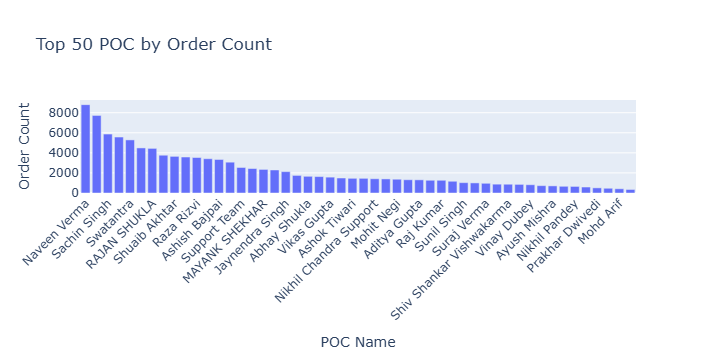

In [35]:
#  Orders by Customer

customer_orders = merged_df['poc_name'].value_counts().reset_index().head(50)
customer_orders.columns = ['POC Name', 'Order Count']

fig = px.bar(customer_orders, x='POC Name', y='Order Count', title='Top 50 POC by Order Count')
fig.update_layout(xaxis_tickangle=-45)
fig.show()


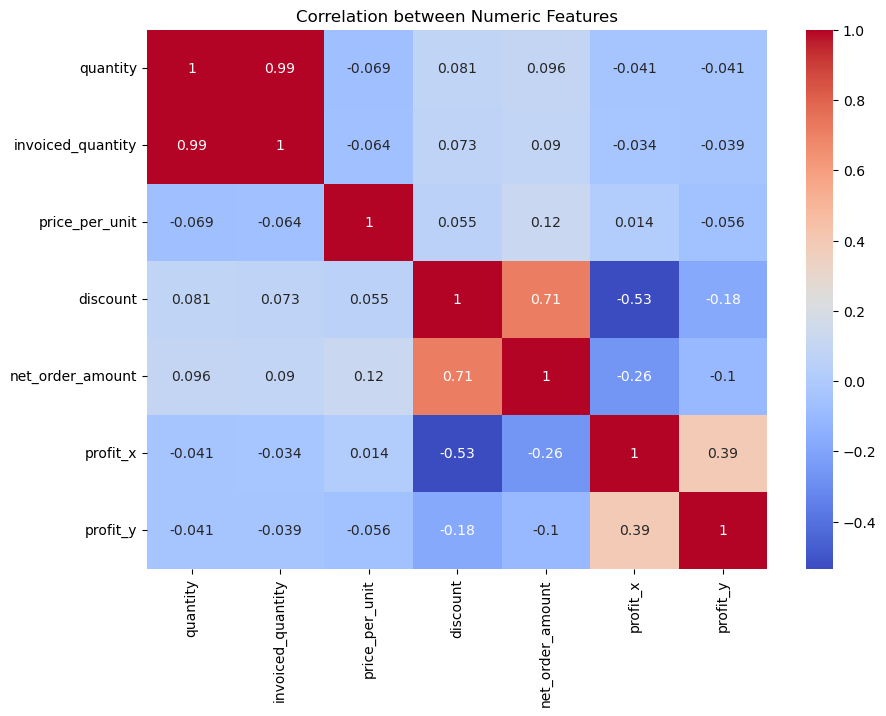

In [38]:
numeric_columns = ['quantity', 'invoiced_quantity', 'price_per_unit', 'discount', 'net_order_amount', 'profit_x', 'profit_y']
corr_matrix = merged_df2[numeric_columns].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Numeric Features')
plt.show()


Order Probability (whether an order gets closed or not)

C:\Users\755ra\AppData\Local\Temp\ipykernel_26608\123640640.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



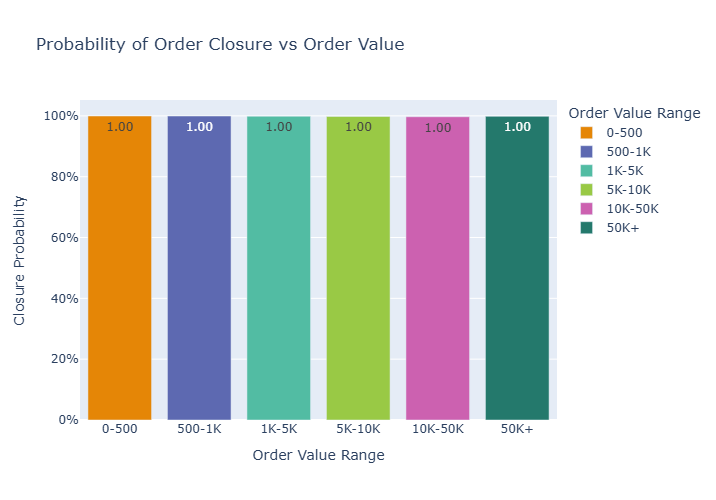

In [40]:
# Order Probability vs Order Value   --> Does the size of the order (order value) affect the likelihood that it will actually get completed (Closed)"

merged_df2['order_success'] = merged_df2['order_status'].apply(lambda x: 1 if x == 'CLOSED' else 0)
merged_df2['order_value_bin'] = pd.cut(merged_df2['net_order_amount'], 
                                      bins=[0, 500, 1000, 5000, 10000, 50000, merged_df2['net_order_amount'].max()],
                                      labels=['0-500', '500-1K', '1K-5K', '5K-10K', '10K-50K', '50K+'])
order_prob = merged_df2.groupby('order_value_bin')['order_success'].mean().reset_index()
order_prob.columns = ['Order Value Range', 'Closure Probability']
import plotly.express as px

fig = px.bar(order_prob, 
             x='Order Value Range', 
             y='Closure Probability',
             title='Probability of Order Closure vs Order Value',
             text_auto='.2f',
             color='Order Value Range',
             color_discrete_sequence=px.colors.qualitative.Vivid)

fig.update_layout(
    yaxis=dict(tickformat=".0%"),
    width=800,
    height=500
)

fig.show()


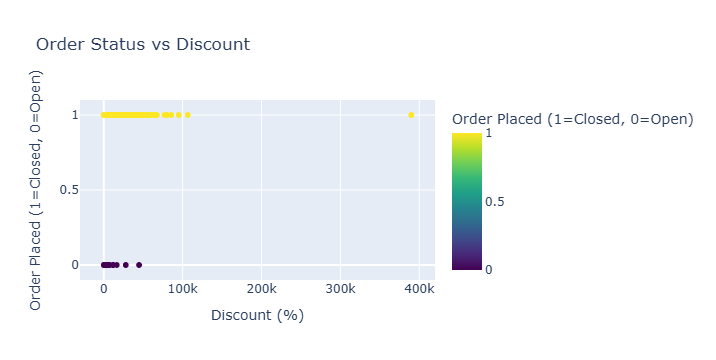

In [41]:
# Assuming 'order_status' is the target variable (1 = Closed, 0 = Open)
# And 'discount' is the feature

# Create a new column to represent "Order Probability" (1 = Closed, 0 = Open)
merged_df['order_placed'] = merged_df['order_status'].apply(lambda x: 1 if x == 'CLOSED' else 0)

# Plot using Plotly Scatter plot
fig = px.scatter(merged_df, x='discount', y='order_placed',
                 title='Order Status vs Discount',
                 labels={'order_placed': 'Order Placed (1=Closed, 0=Open)', 'discount': 'Discount (%)'},
                 color='order_placed', 
                 color_continuous_scale='Viridis')

fig.show()


customer_segment
Occasional Buyer    2023
One-Time Buyer      1162
Frequent Buyer       976
Name: count, dtype: int64


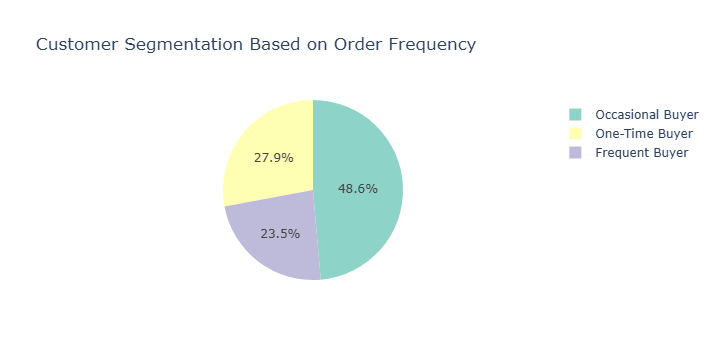

In [43]:
# Get real quantiles

customer_order_counts = merged_df.groupby('customer_id')['order_id'].nunique().reset_index()
customer_order_counts.columns = ['customer_id', 'order_count']
quantiles = customer_order_counts['order_count'].quantile([0.25, 0.75]).to_dict()

def classify_customer(count):
    if count <= quantiles[0.25]:
        return 'One-Time Buyer'
    elif count <= quantiles[0.75]:
        return 'Occasional Buyer'
    else:
        return 'Frequent Buyer'

customer_order_counts['customer_segment'] = customer_order_counts['order_count'].apply(classify_customer)

# Check distribution
print(customer_order_counts['customer_segment'].value_counts())

import plotly.express as px

# Prepare data for plotting
segment_counts = customer_order_counts['customer_segment'].value_counts().reset_index()
segment_counts.columns = ['Customer Segment', 'Count']

# Create the Pie Chart
fig = px.pie(segment_counts, 
             names='Customer Segment', 
             values='Count',
             title='Customer Segmentation Based on Order Frequency',
             color_discrete_sequence=px.colors.qualitative.Set3)

# Show the chart
fig.show()



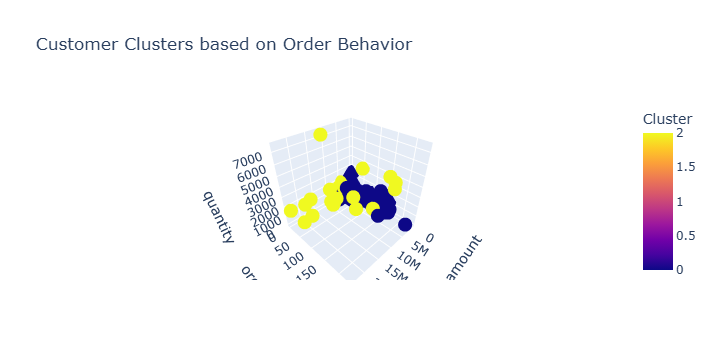

In [44]:
# Clustering Customers Based on Order Behavior

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

customer_features = merged_df2.groupby('customer_id').agg({
    'net_order_amount': 'sum',
    'order_id': 'nunique',
    'quantity': 'sum'
}).reset_index()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(customer_features[['net_order_amount', 'order_id', 'quantity']])

kmeans = KMeans(n_clusters=3, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(X_scaled)

fig = px.scatter_3d(customer_features, x='net_order_amount', y='order_id', z='quantity',
                    color='Cluster', title='Customer Clusters based on Order Behavior')
fig.show()
